In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os


In [2]:

!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
 -O /tmp/rockpaperscissors.zip




--2021-05-23 14:47:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   508KB/s    in 6m 0s   

2021-05-23 14:53:06 (875 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir= '/tmp/rockpaperscissors/rps-cv-images'

os.listdir('/tmp/rockpaperscissors')





['paper', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [5]:

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    height_shift_range=.2,
                    shear_range = 0.2,
                    fill_mode='wrap',
                    validation_split=0.4)
 

train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(100, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        shuffle=True,
        # karena kita merupakan masalah klasifikasi multiclass maka 'categorical'
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
       # karena kita merupakan masalah klasifikasi multiclass maka 'categorical'
        subset='validation')
    

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2  
    )

Epoch 1/20
25/25 - 27s - loss: 0.6450 - accuracy: 0.8312 - val_loss: 0.1893 - val_accuracy: 0.9563
Epoch 2/20
25/25 - 26s - loss: 0.3277 - accuracy: 0.8675 - val_loss: 0.5620 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 26s - loss: 0.3207 - accuracy: 0.8753 - val_loss: 0.2756 - val_accuracy: 0.9125
Epoch 4/20
25/25 - 26s - loss: 0.2824 - accuracy: 0.9143 - val_loss: 0.2291 - val_accuracy: 0.9250
Epoch 5/20
25/25 - 27s - loss: 0.1853 - accuracy: 0.9375 - val_loss: 0.3026 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 27s - loss: 0.1895 - accuracy: 0.9337 - val_loss: 0.1155 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 26s - loss: 0.2127 - accuracy: 0.9247 - val_loss: 0.2181 - val_accuracy: 0.9125
Epoch 8/20
25/25 - 26s - loss: 0.1949 - accuracy: 0.9286 - val_loss: 0.2081 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 27s - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.1970 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 27s - loss: 0.1674 - accuracy: 0.9563 - val_loss: 0.1344 - val_accuracy: 0.9438
Epoch 11/

Saving kertas.jpg to kertas (1).jpg
kertas.jpg
paper


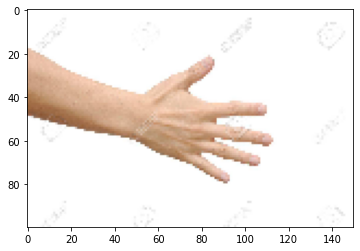

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x]) #i changed batch size to 32
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissor')